In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.express as px

In [17]:
df_ = pd.read_hdf('../../data/caterpillar/labeled_caterpillar_data/labeled_1631506_all.h5', key='star')
print(len(df_))
df_.head()

1094983


,jzstar,jrstar,jphistar,vstar,xstar,ystar,zstar,idstar,estar,cluster_id
175885,0.039345,0.779857,-0.114377,60.083178,-0.003347,-0.011049,-0.008554,48.0,46681.478033,1
175886,0.102213,0.100087,-0.084982,132.371531,-0.001287,0.002246,0.000060,48.0,19641.960398,1
175887,0.686830,0.612427,-0.692681,94.594922,-0.010471,0.000637,0.016642,48.0,54561.968156,1
175888,0.184536,0.193440,-0.072259,93.952449,0.000342,-0.005549,0.000231,48.0,27434.222925,1
175889,0.007741,0.678245,-0.294170,35.021992,-0.009051,0.010974,-0.002689,48.0,44352.653059,1


In [18]:
df = df_.loc[~df_['jzstar'].isnull()]
print(len(df))
df.head()

1094983


,jzstar,jrstar,jphistar,vstar,xstar,ystar,zstar,idstar,estar,cluster_id
175885,0.039345,0.779857,-0.114377,60.083178,-0.003347,-0.011049,-0.008554,48.0,46681.478033,1
175886,0.102213,0.100087,-0.084982,132.371531,-0.001287,0.002246,0.000060,48.0,19641.960398,1
175887,0.686830,0.612427,-0.692681,94.594922,-0.010471,0.000637,0.016642,48.0,54561.968156,1
175888,0.184536,0.193440,-0.072259,93.952449,0.000342,-0.005549,0.000231,48.0,27434.222925,1
175889,0.007741,0.678245,-0.294170,35.021992,-0.009051,0.010974,-0.002689,48.0,44352.653059,1


In [19]:
sunx, suny, sunz = 8.2/1000,0/1000,0 # all units in kiloparsecs
radius = 0.005 # 5 kiloparsecs

In [20]:
df_ = df_.loc[(df_['xstar']-sunx)**2 + (df_['ystar']-suny)**2 + (df_['zstar']-sunz)**2 < radius**2]

In [21]:
print(len(df_))

41180


<AxesSubplot: xlabel='xstar', ylabel='zstar'>

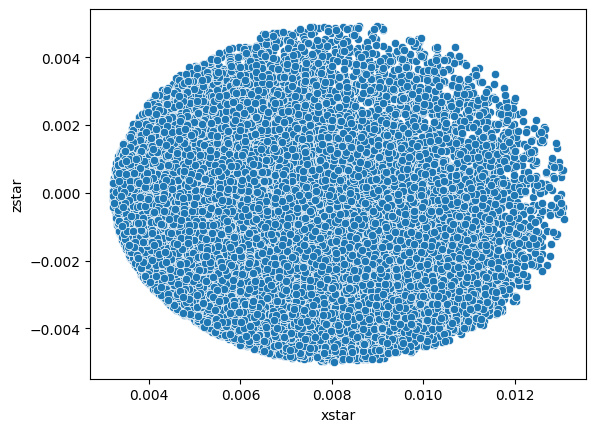

In [22]:
sns.scatterplot(data=df_, x='xstar', y='zstar')

In [60]:
chosen_ids = np.random.choice(len(df_), min(len(df_), 1000000))
df = df_.iloc[chosen_ids].copy()

<AxesSubplot: xlabel='jphistar', ylabel='estar'>

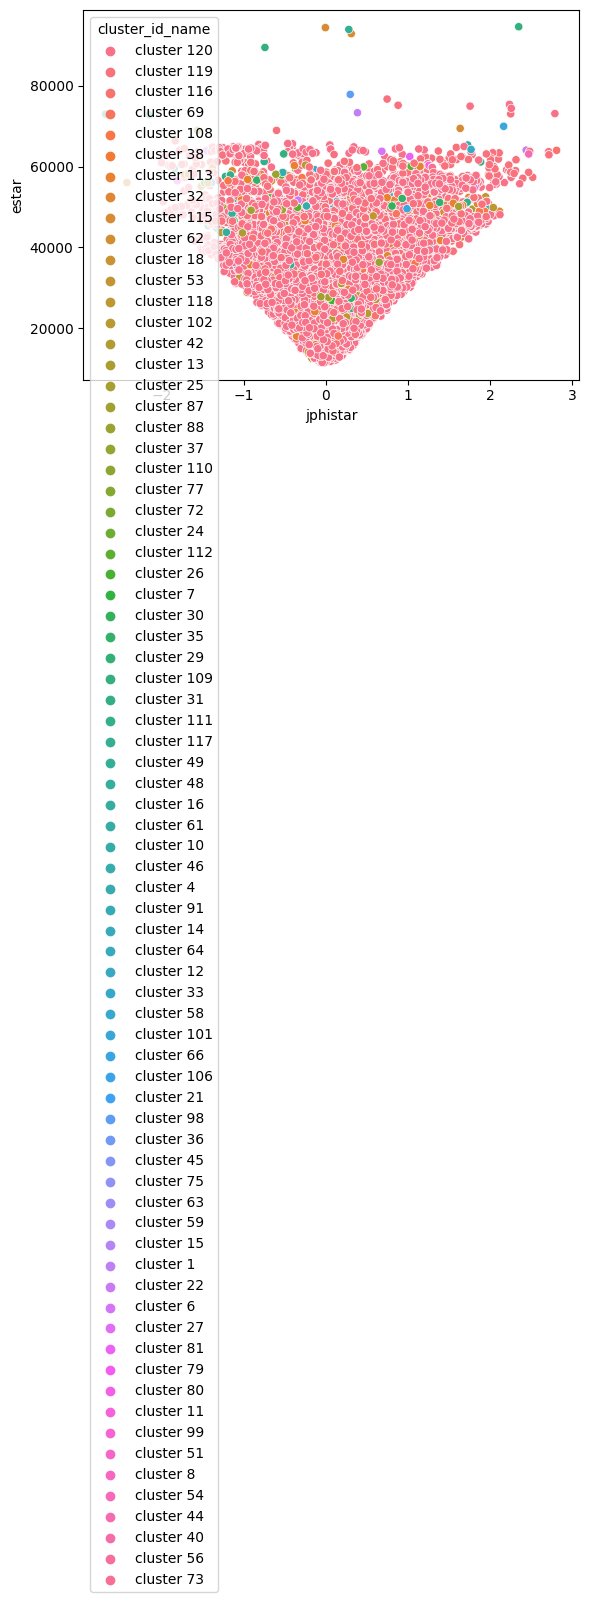

In [61]:
df['cluster_id_name'] = [f'cluster {i}' for i in df['cluster_id']]
sns.scatterplot(data=df, x='jphistar', y='estar', hue='cluster_id_name')

In [62]:
cluster_ids = [i for i,c in Counter(df['cluster_id']).most_common()[:10]]
print(cluster_ids)
print(Counter(df['cluster_id']).most_common()[:10])

[120, 119, 113, 116, 118, 69, 108, 115, 87, 42]
[(120, 31959), (119, 4504), (113, 763), (116, 401), (118, 287), (69, 142), (108, 115), (115, 103), (87, 99), (42, 91)]


In [63]:
df_small = df.loc[df['cluster_id'].isin(cluster_ids)]

In [64]:
df_small.head()

,jzstar,jrstar,jphistar,vstar,xstar,ystar,zstar,idstar,estar,cluster_id,cluster_id_name
1040529,0.350749,0.071655,0.149844,124.355869,0.004526,0.000380,-0.001855,293054.0,22929.666521,120,cluster 120
1114895,0.614480,0.489228,-0.215999,154.513535,0.008948,-0.004238,-0.000467,293054.0,38085.487884,120,cluster 120
517663,0.272250,0.146636,0.621536,187.131627,0.004777,-0.000372,-0.000309,293054.0,32703.072474,120,cluster 120
617696,0.240050,0.088521,-0.773315,149.833303,0.006992,-0.000359,-0.002742,293054.0,32298.495147,120,cluster 120
306583,0.323493,0.436412,1.143621,197.086159,0.008877,-0.002739,-0.000140,293054.0,44883.060391,120,cluster 120


## Plotting Caterpillar Data

<AxesSubplot: xlabel='jzstar', ylabel='jrstar'>

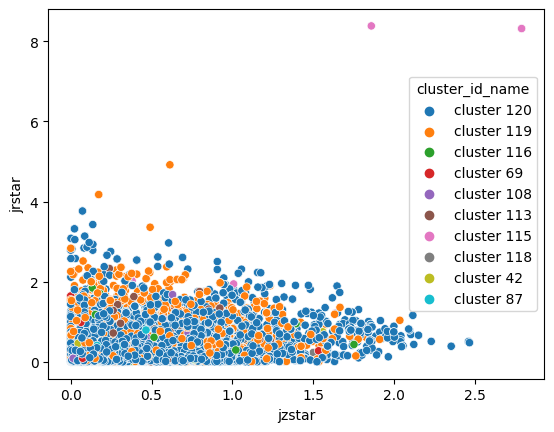

In [68]:
sns.scatterplot(data=df_small, x='jzstar', y='jrstar', hue='cluster_id_name')

<AxesSubplot:>

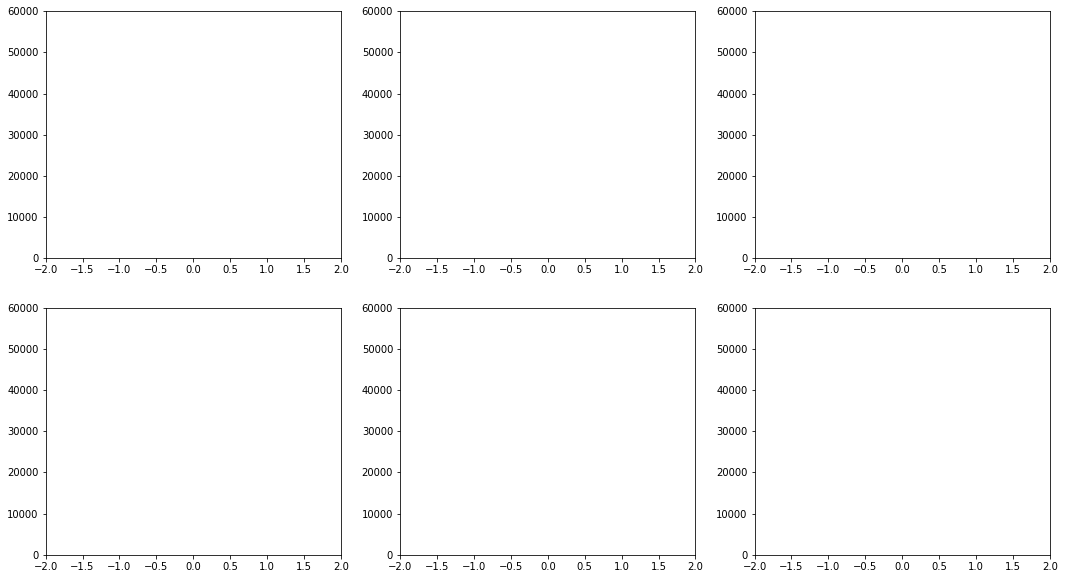

In [54]:
sample_ids = np.random.choice(len(df_small), min(len(df_small), 2000), replace=False)
df_small_ = df_small.iloc[sample_ids].copy()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
df_small_1 = df_small_.loc[df_small_['cluster_id'] == 80]
df_small_2 = df_small_.loc[df_small_['cluster_id'] == 79]
df_small_3 = df_small_.loc[df_small_['cluster_id'] == 74]
df_small_4 = df_small_.loc[df_small_['cluster_id'] == 76]
df_small_5 = df_small_.loc[df_small_['cluster_id'] == 78]
df_small_6 = df_small_.loc[df_small_['cluster_id'] == 50]

[ax.set_ylim(0, 60000) for ax in axes.flatten()]
[ax.set_xlim(-2, 2) for ax in axes.flatten()]


sns.scatterplot(data=df_small_1, ax=axes[0,0], x='jphistar', y='estar', hue='cluster_id_name')
sns.scatterplot(data=df_small_2, ax=axes[0,1], x='jphistar', y='estar', hue='cluster_id_name')
sns.scatterplot(data=df_small_3, ax=axes[0,2], x='jphistar', y='estar', hue='cluster_id_name')
sns.scatterplot(data=df_small_4, ax=axes[1,0], x='jphistar', y='estar', hue='cluster_id_name')
sns.scatterplot(data=df_small_5, ax=axes[1,1], x='jphistar', y='estar', hue='cluster_id_name')
sns.scatterplot(data=df_small_6, ax=axes[1,2], x='jphistar', y='estar', hue='cluster_id_name')

<AxesSubplot:>

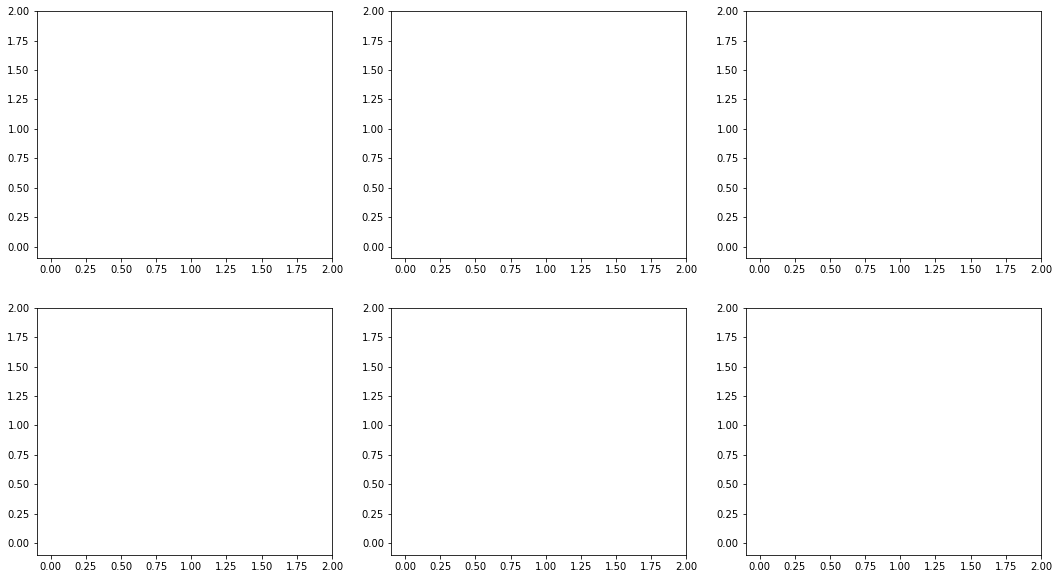

In [55]:
sample_ids = np.random.choice(len(df_small), min(len(df_small), 2000), replace=False)
df_small_ = df_small.iloc[sample_ids].copy()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
df_small_1 = df_small_.loc[df_small_['cluster_id'] == 80]
df_small_2 = df_small_.loc[df_small_['cluster_id'] == 79]
df_small_3 = df_small_.loc[df_small_['cluster_id'] == 74]
df_small_4 = df_small_.loc[df_small_['cluster_id'] == 76]
df_small_5 = df_small_.loc[df_small_['cluster_id'] == 78]
df_small_6 = df_small_.loc[df_small_['cluster_id'] == 50]

[ax.set_ylim(-0.1, 2) for ax in axes.flatten()]
[ax.set_xlim(-0.1, 2) for ax in axes.flatten()]


sns.scatterplot(data=df_small_1, ax=axes[0,0], x='jzstar', y='jrstar', hue='cluster_id_name')
sns.scatterplot(data=df_small_2, ax=axes[0,1], x='jzstar', y='jrstar', hue='cluster_id_name')
sns.scatterplot(data=df_small_3, ax=axes[0,2], x='jzstar', y='jrstar', hue='cluster_id_name')
sns.scatterplot(data=df_small_4, ax=axes[1,0], x='jzstar', y='jrstar', hue='cluster_id_name')
sns.scatterplot(data=df_small_5, ax=axes[1,1], x='jzstar', y='jrstar', hue='cluster_id_name')
sns.scatterplot(data=df_small_6, ax=axes[1,2], x='jzstar', y='jrstar', hue='cluster_id_name')

## Simple Clustering on Caterpillar Data

In [22]:
import sys
sys.path.append('../../')
from cluster_analysis import *
from evaluation_metrics import *
from neural_dataset import *

In [23]:
feature_columns = ['estar', 'jrstar', 'jzstar', 'jphistar']
df_norm = pd.DataFrame({'mean':{feature : df[feature].mean() for feature in feature_columns}, \
                        'std':{feature : df[feature].std() for feature in feature_columns}})

In [25]:
dataset = ClusterDataset(df, feature_columns, 'cluster_id', feature_norms=df_norm)
features = dataset.features.numpy()
labels = dataset.labels.numpy()

In [26]:
def evaluate_once(features, labels, clusterer):
    clusterer.add_data(features)
    clusters = clusterer.fit()
    cluster_eval = ClusterEvalAll(clusters, labels)
    print(cluster_eval())
    return cluster_eval()

In [29]:
clusterer = C_HDBSCAN(metric='manhattan', min_cluster_size=10, min_samples=5, cluster_selection_method='eom')
evaluate_once(features, labels, clusterer)

[ 4  6 53 59 81 82]
[0 6 1 3 5 4]
{'IoU_TP': 5, 'IoU_T': 126, 'IoU_P': 8, 'IoU_precision': 0.625, 'IoU_recall': 0.03968253968253968, 'IoU_F1': 0.07462686567164178, 'Mode_TP': 6, 'Mode_T': 126, 'Mode_P': 8, 'Mode_precision': 0.75, 'Mode_recall': 0.047619047619047616, 'Mode_F1': 0.08955223880597014, 'Mode_TP_C': 3768, 'Mode_recall_C': 0.09017590044274261, 'Purity': 0.09132463802800048, 'AMI': 0.044270351659702736, 'ARand': 0.0014382765591704426, 'ModeSoft_TP': 6, 'ModeSoft_T': 126, 'ModeSoft_P': 8, 'ModeSoft_precision': 0.75, 'ModeSoft_recall': 0.047619047619047616, 'ModeSoft_F1': 0.08955223880597014, 'ModeSoft_TP_C': 3731.4471428569263, 'ModeSoft_recall_C': 0.0893011162583924, 'ModeProb_TP': 6, 'ModeProb_T': 126, 'ModeProb_P': 8, 'ModeProb_precision': 0.75, 'ModeProb_recall': 0.047619047619047616, 'ModeProb_F1': 0.08955223880597014}


{'IoU_TP': 5,
 'IoU_T': 126,
 'IoU_P': 8,
 'IoU_precision': 0.625,
 'IoU_recall': 0.03968253968253968,
 'IoU_F1': 0.07462686567164178,
 'Mode_TP': 6,
 'Mode_T': 126,
 'Mode_P': 8,
 'Mode_precision': 0.75,
 'Mode_recall': 0.047619047619047616,
 'Mode_F1': 0.08955223880597014,
 'Mode_TP_C': 3768,
 'Mode_recall_C': 0.09017590044274261,
 'Purity': 0.09132463802800048,
 'AMI': 0.044270351659702736,
 'ARand': 0.0014382765591704426,
 'ModeSoft_TP': 6,
 'ModeSoft_T': 126,
 'ModeSoft_P': 8,
 'ModeSoft_precision': 0.75,
 'ModeSoft_recall': 0.047619047619047616,
 'ModeSoft_F1': 0.08955223880597014,
 'ModeSoft_TP_C': 3731.4471428569263,
 'ModeSoft_recall_C': 0.0893011162583924,
 'ModeProb_TP': 6,
 'ModeProb_T': 126,
 'ModeProb_P': 8,
 'ModeProb_precision': 0.75,
 'ModeProb_recall': 0.047619047619047616,
 'ModeProb_F1': 0.08955223880597014}

In [34]:
clusterer = C_GaussianMixture(n_components=126)
evaluate_once(features, labels, clusterer)

[  1   3   4  19  53  59  72  81  82 105]
[  7  93  17  97  32 113  41  10   5  53]
{'IoU_TP': 9, 'IoU_T': 126, 'IoU_P': 126, 'IoU_precision': 0.07142857142857142, 'IoU_recall': 0.07142857142857142, 'IoU_F1': 0.07142857142857142, 'Mode_TP': 42, 'Mode_T': 126, 'Mode_P': 126, 'Mode_precision': 0.3333333333333333, 'Mode_recall': 0.3333333333333333, 'Mode_F1': 0.3333333333333333, 'Mode_TP_C': 4966, 'Mode_recall_C': 0.11884647600813689, 'Purity': 0.2731602249611104, 'AMI': 0.32610344860339985, 'ARand': 0.07663742142115489, 'ModeSoft_TP': 39, 'ModeSoft_T': 126, 'ModeSoft_P': 126, 'ModeSoft_precision': 0.30952380952380953, 'ModeSoft_recall': 0.30952380952380953, 'ModeSoft_F1': 0.30952380952380953, 'ModeSoft_TP_C': 4816.734159999988, 'ModeSoft_recall_C': 0.11527424099557229, 'ModeProb_TP': 10, 'ModeProb_T': 126, 'ModeProb_P': 126, 'ModeProb_precision': 0.07936507936507936, 'ModeProb_recall': 0.07936507936507936, 'ModeProb_F1': 0.07936507936507936}


{'IoU_TP': 9,
 'IoU_T': 126,
 'IoU_P': 126,
 'IoU_precision': 0.07142857142857142,
 'IoU_recall': 0.07142857142857142,
 'IoU_F1': 0.07142857142857142,
 'Mode_TP': 42,
 'Mode_T': 126,
 'Mode_P': 126,
 'Mode_precision': 0.3333333333333333,
 'Mode_recall': 0.3333333333333333,
 'Mode_F1': 0.3333333333333333,
 'Mode_TP_C': 4966,
 'Mode_recall_C': 0.11884647600813689,
 'Purity': 0.2731602249611104,
 'AMI': 0.32610344860339985,
 'ARand': 0.07663742142115489,
 'ModeSoft_TP': 39,
 'ModeSoft_T': 126,
 'ModeSoft_P': 126,
 'ModeSoft_precision': 0.30952380952380953,
 'ModeSoft_recall': 0.30952380952380953,
 'ModeSoft_F1': 0.30952380952380953,
 'ModeSoft_TP_C': 4816.734159999988,
 'ModeSoft_recall_C': 0.11527424099557229,
 'ModeProb_TP': 10,
 'ModeProb_T': 126,
 'ModeProb_P': 126,
 'ModeProb_precision': 0.07936507936507936,
 'ModeProb_recall': 0.07936507936507936,
 'ModeProb_F1': 0.07936507936507936}